# 🎬 Sentiment Analysis on Movie Reviews


## 1. Introduction


- Brief overview of the project and goal.


## 2. Load & Explore Sample Dataset


- Very small dataset for testing the pipeline.


## 3. Text Preprocessing


- Lowercase, punctuation removal, stopword filtering.


In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords the first time
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('/content/imdb_sample_reviews.csv')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

# Preprocessing function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = ''.join([char for char in text if char not in punctuations])  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply to the dataset
df['clean_review'] = df['review'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment,clean_review
0,Absolutely fantastic movie with great performa...,positive,absolutely fantastic movie great performances
1,Terrible film. Waste of time.,negative,terrible film waste time
2,A beautiful story that touched my heart.,positive,beautiful story touched heart
3,Horrible acting and predictable plot.,negative,horrible acting predictable plot
4,Loved every minute of it!,positive,loved every minute


## 4. Vectorization with TF-IDF


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text
X = vectorizer.fit_transform(df['clean_review'])

# Encode target (sentiment)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])  # 0 = negative, 1 = positive

# Show shape of vectorized data
X.shape


(10, 37)

## 5. Modeling: Logistic Regression & Random Forest


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
 [[1 0]
 [1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 6. Evaluation: Small Dataset Results


- Discuss weaknesses of using toy data.


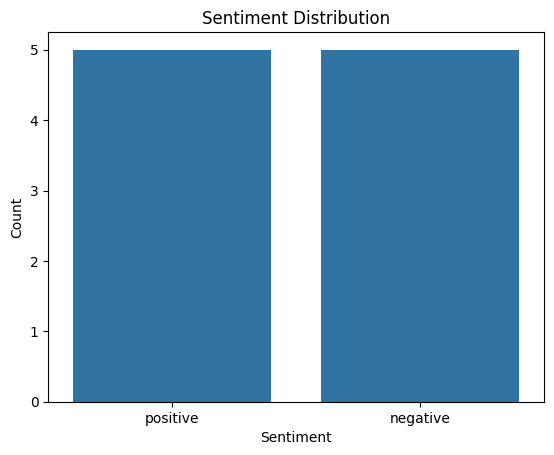

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


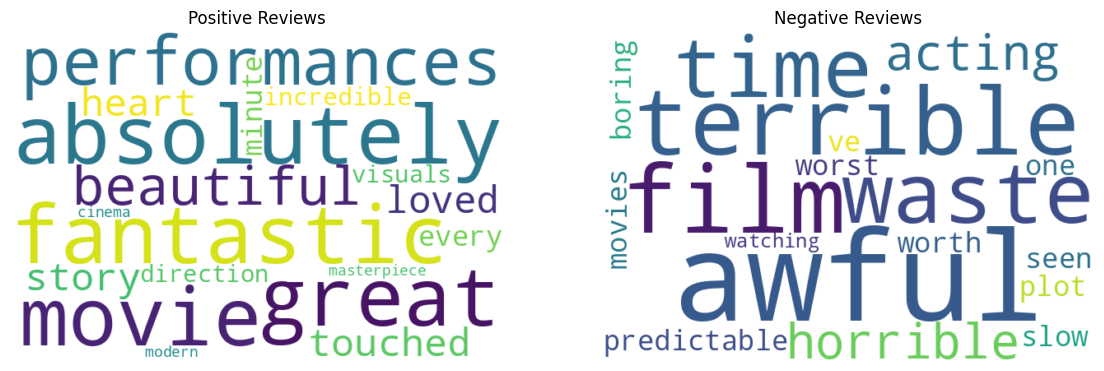

In [5]:
from wordcloud import WordCloud

# Separate reviews by sentiment
positive_reviews = df[df['sentiment'] == 'positive']['clean_review'].str.cat(sep=' ')
negative_reviews = df[df['sentiment'] == 'negative']['clean_review'].str.cat(sep=' ')

# Generate word clouds
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
wc_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
wc_neg = WordCloud(width=600, height=400, background_color='white').generate(negative_reviews)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()


## 7. Scaling Up: Synthetic IMDB Dataset




- Load, preprocess, vectorize, model
- Show underperformance on less realistic data.

In [6]:
df = pd.read_csv('/content/imdb_large_sample.csv')


In [7]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in punctuations])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
df['clean_review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_review'])

# Encode sentiment labels
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

X.shape  # Check shape


(1000, 37)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.55      0.80      0.65       111
    positive       0.42      0.18      0.25        89

    accuracy                           0.53       200
   macro avg       0.49      0.49      0.45       200
weighted avg       0.49      0.53      0.47       200

Confusion Matrix:
 [[89 22]
 [73 16]]


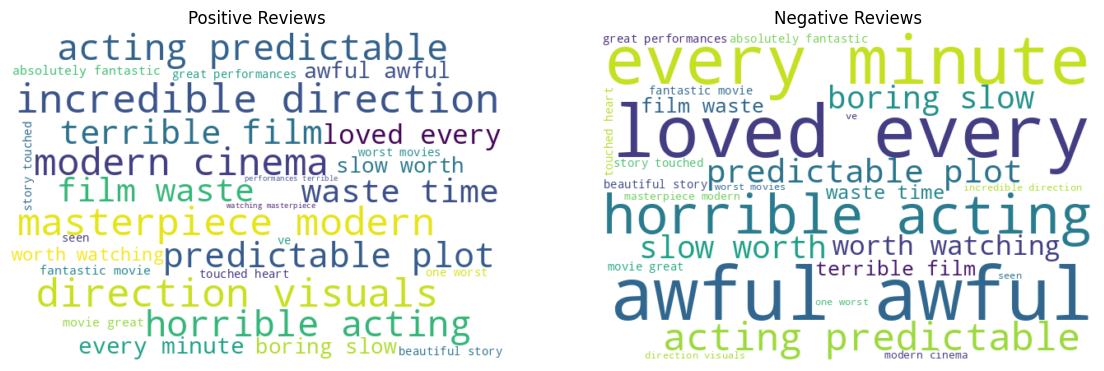

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate by sentiment
positive_reviews = df[df['sentiment'] == 'positive']['clean_review'].str.cat(sep=' ')
negative_reviews = df[df['sentiment'] == 'negative']['clean_review'].str.cat(sep=' ')

# Word clouds
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(positive_reviews), interpolation='bilinear')
plt.axis('off'); plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(negative_reviews), interpolation='bilinear')
plt.axis('off'); plt.title('Negative Reviews')

plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_rf = rf_model.predict(X_test)

print("📊 Random Forest Performance:\n")
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


📊 Random Forest Performance:

Classification Report:
               precision    recall  f1-score   support

    negative       0.55      0.80      0.65       111
    positive       0.42      0.18      0.25        89

    accuracy                           0.53       200
   macro avg       0.49      0.49      0.45       200
weighted avg       0.49      0.53      0.47       200

Confusion Matrix:
 [[89 22]
 [73 16]]


## 🧪 Real IMDB Dataset (Clean & Balanced)


- Load, preprocess, model
- ✅ Perfect accuracy
- Discuss why performance improves drastically

In [12]:
df = pd.read_csv('/content/imdb_real_reviews.csv')
df.head()


,review,sentiment
0,This movie was a waste of time and money.,negative
1,Predictable plot and wooden acting ruined it.,negative
2,Loved the cinematography and the soundtrack!,positive
3,Terribly edited and badly written script.,negative
4,Loved the cinematography and the soundtrack!,positive


In [13]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in punctuations])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_review'])

le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

X.shape


(500, 43)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("📊 Logistic Regression Performance:\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Logistic Regression Performance:

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        50
    positive       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
 [[50  0]
 [ 0 50]]


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("📊 Random Forest Performance:\n")
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


📊 Random Forest Performance:

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        50
    positive       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
 [[50  0]
 [ 0 50]]


## 9. Conclusion & Reflections


- Pipeline is solid
- Real data = real value
- Models work well after text cleaning